In [2]:
import pandas as pd 
df = pd.read_csv("scraping.csv")
print(df)

      Unnamed: 0                                               text
0              0  Timestamp :\n0:00 opening\n0:25 disclaimer \n1...
1              1  Team speaker Eggel, sudah punya yang Eggel Fit...
2              2  Wah kebetulan lagi nyari Speaker Bluetooth yan...
3              3  Masih QCY Box 2 tetap di hati, gua punya speak...
4              4  This is where local industries start rising. P...
...          ...                                                ...
1419        1419                                                nah
1420        1420                                          Tod bacod
1421        1421         sori gw dislike, textnya mengganggu gambar
1422        1422                                             Rinrei
1423        1423                                                 31

[1424 rows x 2 columns]


In [3]:
def clean(a,b):
    df['text']= df['text'].str.replace(a,b)

df['text'] = df['text'].astype(str).str.lower()
df.text = df.text.str.replace('\d+', '')
clean('.','')
clean(',','')
clean('-','')
clean('/','')
clean(':','')
clean(':\n','')
clean("\n",'')
clean(":\n",'')
df.to_csv('hasilclening.csv')

C:\Users\jhonm\AppData\Local\Temp\ipykernel_32008\28908276.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df.text = df.text.str.replace('\d+', '')
C:\Users\jhonm\AppData\Local\Temp\ipykernel_32008\28908276.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['text']= df['text'].str.replace(a,b)


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df['text'].values.astype('U')) 
print(x) 

  (0, 594)	0.10288308248245431
  (0, 1683)	0.10718779443322865
  (0, 2167)	0.09450930809450947
  (0, 3680)	0.11325494516535423
  (0, 1295)	0.10288308248245431
  (0, 932)	0.18901861618901894
  (0, 2163)	0.07487449254244594
  (0, 2928)	0.11325494516535423
  (0, 3790)	0.09954408848851501
  (0, 3777)	0.10718779443322865
  (0, 1173)	0.06312887357687928
  (0, 1445)	0.05288884817728097
  (0, 12)	0.15522645567541352
  (0, 1705)	0.0891722258056151
  (0, 2178)	0.10288308248245431
  (0, 946)	0.08037691833530322
  (0, 1714)	0.0831050750734895
  (0, 2788)	0.11429897035522107
  (0, 2895)	0.14001011130480664
  (0, 3145)	0.09681593175032872
  (0, 2175)	0.0891722258056151
  (0, 3694)	0.09681593175032872
  (0, 3665)	0.08123220453734968
  (0, 173)	0.08123220453734968
  (0, 3654)	0.07176749443375455
  :	:
  (1414, 1980)	0.5164326787579152
  (1414, 1086)	0.27890084858132724
  (1414, 23)	0.22606388788294693
  (1414, 3589)	0.2664606916388117
  (1415, 1135)	0.5325178346677636
  (1415, 1227)	0.5039904625008588

Amount of clusters: 6


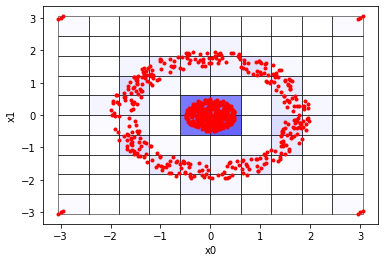

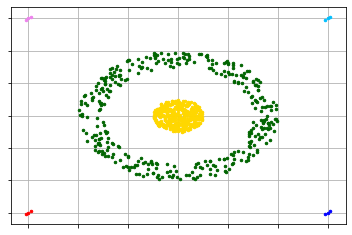

In [9]:
from pyclustering.cluster.clique import clique, clique_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES
# baca two-dimendional data 'Target'
data = read_sample(FCPS_SAMPLES.SAMPLE_TARGET)
# gunakan comand di bawah untuk implementasi algoritma CLIQUE
intervals = 10  #menentukan berapa banyak cells di dalam grid
threshold = 0   # lets consider each point as non-outlier
clique_instance = clique(data, intervals, threshold)
# gunakan command di bawah untuk memulai proses clusterisasi 
clique_instance.process()
clusters = clique_instance.get_clusters()  # alokasi cluster
noise = clique_instance.get_noise()     # points yang menentukan outliers
cells = clique_instance.get_cells()     # CLIQUE blocks 
print("Amount of clusters:", len(clusters))
# visualisasi data clustering
clique_visualizer.show_grid(cells, data)    # menunjukan proses pembagian cell 
clique_visualizer.show_clusters(data, clusters, noise)  # show clustering results
